In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist,mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten
from keras.utils.np_utils import to_categorical

In [53]:
(X_train, y_train), (X_test, y_test) = mnist.load_data("/tmp/mnist.npz")

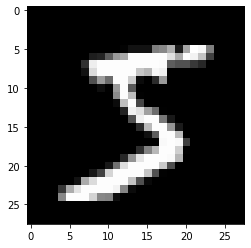

In [54]:
plt.imshow(X_train[0],cmap='gray')

In [55]:
X_train = X_train.reshape(-1, 28*28).astype('float32')/255.0
X_test = X_test.reshape(-1, 28*28).astype('float32')/255.0

In [56]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [57]:
model = Sequential([
    Dense(512, input_dim=28*28, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, validation_split=0.1,verbose=0)

0.9798722207546234 0.9780833423137665


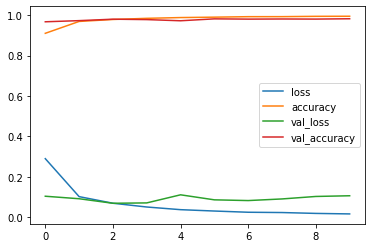

In [58]:
print(np.mean(np.array(h.history['accuracy'])),np.mean(np.array(h.history['val_accuracy'])))
pd.DataFrame(h.history).plot()

In [59]:
# X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
# X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [60]:
# model = Sequential([
#     Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
#     Flatten(),
#     Dense(10, activation='softmax')
# ])

# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# h = model.fit(X_train, y_train, batch_size=128, epochs=3, validation_split=0.1)